# Importing Libraries and Dataset

In [1]:
#Importing Necessary Libraries

'''Operating System Functionality'''
import os

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score

'''Classification & Regression'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [4]:
#Loading data into a dataframe
df = pd.read_csv("star_classification.csv")

# EDA

"U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [8]:
df.shape

(100000, 18)

In [11]:
df.drop(['obj_ID', 'spec_obj_ID'], axis=1, inplace=True)

In [12]:
df.shape

(100000, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   run_ID    100000 non-null  int64  
 8   rerun_ID  100000 non-null  int64  
 9   cam_col   100000 non-null  int64  
 10  field_ID  100000 non-null  int64  
 11  class     100000 non-null  object 
 12  redshift  100000 non-null  float64
 13  plate     100000 non-null  int64  
 14  MJD       100000 non-null  int64  
 15  fiber_ID  100000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 12.2+ MB


## Label Encoding Class

In [15]:
le = LabelEncoder().fit(df['class'])
df['class'] = le.transform(df['class'])

In [19]:
df.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,0,0.116123,6121,56187,842


In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standard Scaling
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [22]:
# Train-Test Split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [ ]:
# Show first 20 rows of scaled data
X[:20]

# Density Distribution Plots

<Axes: xlabel='class', ylabel='count'>

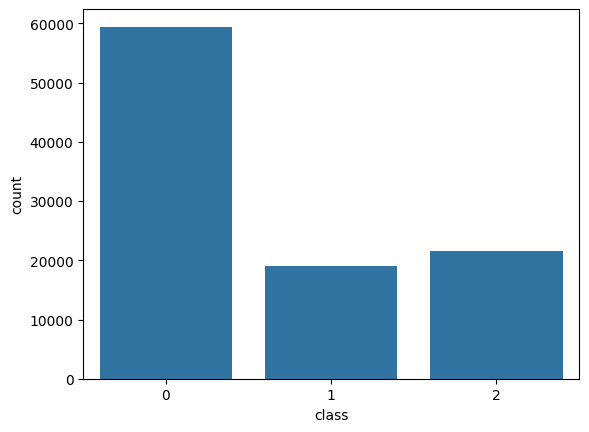

In [24]:
#Checking the number of labels for each class of the dataset where 0 = Galaxy, 1 = Quasar, 2 = Star.
sns.countplot(x=df['class'])

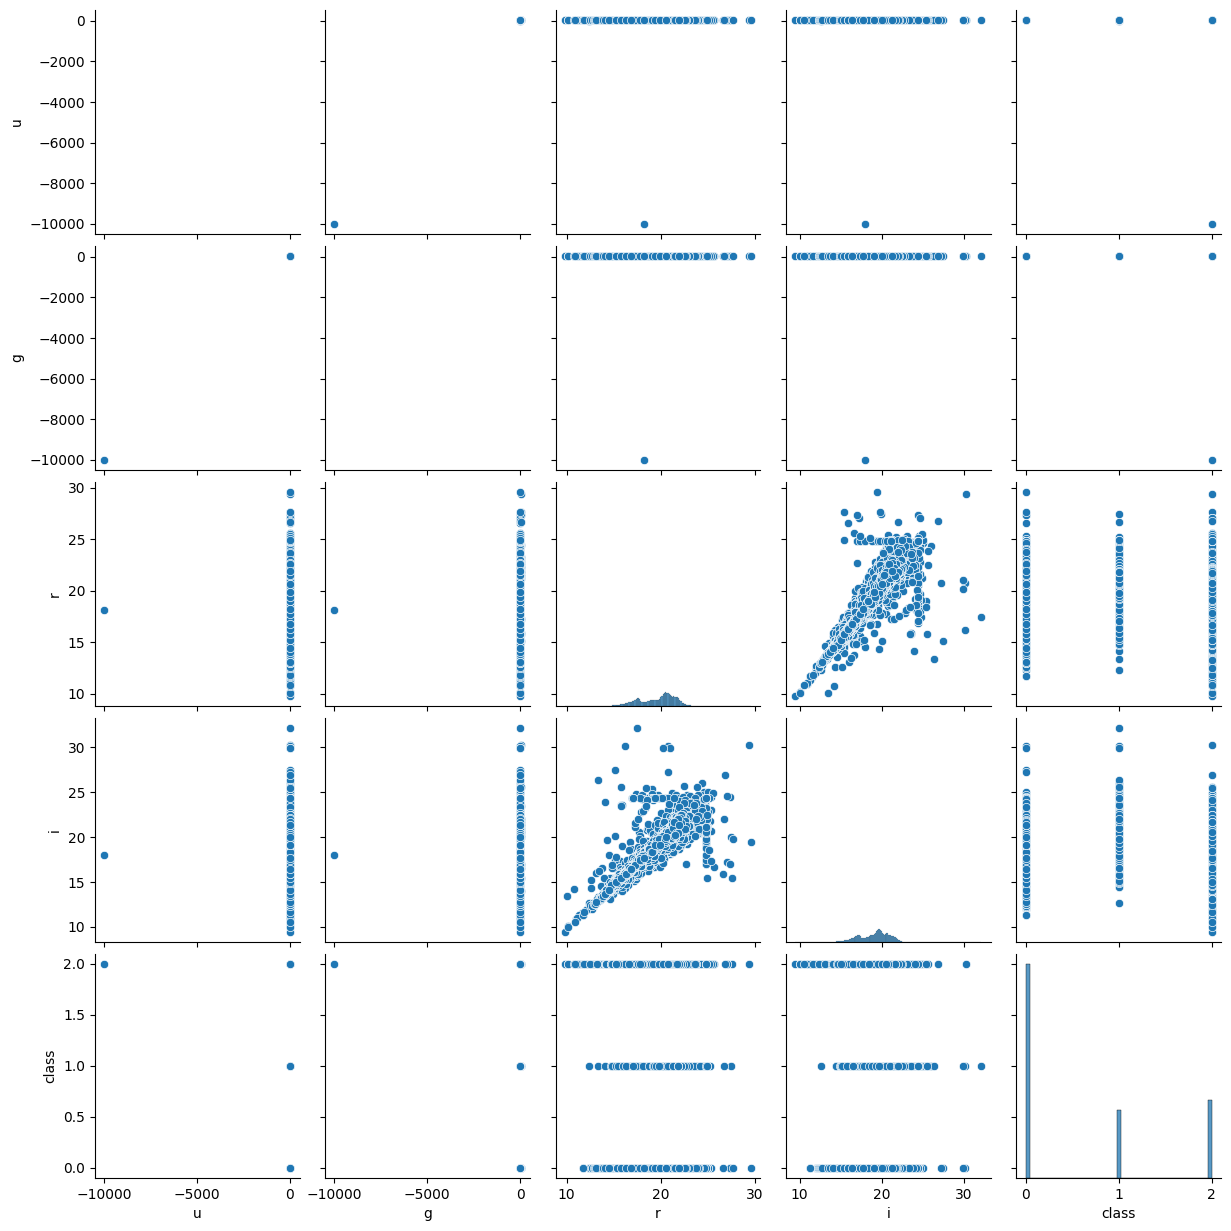

In [25]:
#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(df[['u','g','r','i','class']])

# Applying ML Models

## Decision Trees

In [26]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

## Logistic Regression

In [27]:
LRClassifer = LogisticRegression()

## KNN

In [28]:
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

## SVM

In [29]:
SVMClassifier = SVC(kernel='linear')

## Naive Bayes

In [30]:
NBClassifier = GaussianNB()

# Fitting the Models

In [31]:
dtClassifer.fit(X_train, y_train)
LRClassifer.fit(X_train, y_train)
NeNeClassifier.fit(X_train, y_train)
SVMClassifier.fit(X_train, y_train)
NBClassifier.fit(X_train, y_train)

GaussianNB()

## Getting Predictions

In [33]:
# Getting predictions from the models
y_preds_dt = dtClassifer.predict(X_test)  # Decision Tree
y_predsLR = LRClassifer.predict(X_test)   # Logistic Regression
y_predsNeNe = NeNeClassifier.predict(X_test)  # KNN
y_predsSVM = SVMClassifier.predict(X_test)  # SVM
y_predsNB = NBClassifier.predict(X_test)  # Naive Bayes

In [34]:
print("Decision Tree Predictions vs Actual:")
print(y_preds_dt[-10:], '\n', y_test[-10:])

print("\n*******************************************************")
print("Logistic Regression Predictions vs Actual:")
print(y_predsLR[-10:], '\n', y_test[-10:])

print("\n*******************************************************")
print("K-Nearest Neighbors Predictions vs Actual:")
print(y_predsNeNe[-10:], '\n', y_test[-10:])

print("\n*******************************************************")
print("SVM Predictions vs Actual:")
print(y_predsSVM[-10:], '\n', y_test[-10:])

print("\n*******************************************************")
print("Naive Bayes Predictions vs Actual:")
print(y_predsNB[-10:], '\n', y_test[-10:])

Decision Tree Predictions vs Actual:
[0 0 0 2 2 0 1 1 0 2] 
 56843    0
40408    0
11168    0
7840     2
60796    2
5573     0
68809    1
14295    1
34046    0
19262    2
Name: class, dtype: int64

*******************************************************
Logistic Regression Predictions vs Actual:
[0 0 0 2 2 0 1 1 0 2] 
 56843    0
40408    0
11168    0
7840     2
60796    2
5573     0
68809    1
14295    1
34046    0
19262    2
Name: class, dtype: int64

*******************************************************
K-Nearest Neighbors Predictions vs Actual:
[0 0 0 2 2 0 1 1 0 2] 
 56843    0
40408    0
11168    0
7840     2
60796    2
5573     0
68809    1
14295    1
34046    0
19262    2
Name: class, dtype: int64

*******************************************************
SVM Predictions vs Actual:
[0 0 0 2 2 0 1 1 0 2] 
 56843    0
40408    0
11168    0
7840     2
60796    2
5573     0
68809    1
14295    1
34046    0
19262    2
Name: class, dtype: int64

**************************************

# Classification Report

In [35]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2']  # 0 = Galaxy, 1 = Quasar, 2 = Star

print('\033[1m  Decision Tree -\n  \033[0m', classification_report(y_test, y_preds_dt, target_names=target_names))
print('\033[1m  Logistic Regression -\n  \033[0m', classification_report(y_test, y_predsLR, target_names=target_names))
print('\033[1m  KNN Classifier -\n  \033[0m', classification_report(y_test, y_predsNeNe, target_names=target_names))
print('\033[1m  SVM Classifier -\n  \033[0m', classification_report(y_test, y_predsSVM, target_names=target_names))
print('\033[1m  Naive Bayes -\n  \033[0m', classification_report(y_test, y_predsNB, target_names=target_names))

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.94      0.98      0.96     17878
           1       0.94      0.80      0.86      5629
           2       0.99      1.00      1.00      6493

    accuracy                           0.95     30000
   macro avg       0.96      0.93      0.94     30000
weighted avg       0.95      0.95      0.95     30000

  Logistic Regression -
                 precision    recall  f1-score   support

           0       0.96      0.97      0.96     17878
           1       0.95      0.88      0.91      5629
           2       0.95      1.00      0.97      6493

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.89      0.96      0.92     17878
           1       0.96      0.83      0.89      5629
     